# 2.张量简介与创建

Q:张量是什么？
- 一个多维数组，它是标量、向量、矩阵的高维拓展
- ![](http://anki190912.xuexihaike.com/20200918142143.png?imageView2/2/h/150)

Q:Pytorch中的Variable是什么？与Tensor的关系是什么？
- Variable是torch.autograd中的数据类型主要用于封装Tensor，进行自动求导
- data:被包装的Tensor
- grad:data的梯度
- grad_fn:创建Tensor的Function，是自动求导的关键
- requires_grad:指示是否需要梯度
- is_leaf:指示是否是叶子结点（张量）
- ![](http://anki190912.xuexihaike.com/20200918143346.png?imageView2/2/w/200)

Q:Pytorch中的Tensor是什么？
- PyTorch 0.4.0开始，Variable并入Tensor
- dtype: 张量的数据类型，如torch.FloatTensor, torch.cuda.FloatTensor
- shape: 张量的形状，如（64，3， 224， 224）
- device: 张量所在设备，GPU/CPU，是加速的关键
- ![](http://anki190912.xuexihaike.com/20200918143722.png?imageView2/2/h/100)

Q:Tensor的函数原型是怎样？
- `torch.tensor(data, dtype=None, device=None, requires_grad=False, pin_memory=False)`
- 功能：从data创建tensor
- data: 数据，可以是list，numpy
- dtype: 数据类型，默认与data一致
- device: 所在设备，cuda/cpu
- requires_grad: 是否需要梯度
- pin_memory:是否存于锁页内存

Q:通过torch.tensor创建Tensor的代码是什么？

In [4]:
import torch
import numpy as np

arr = np.ones((3, 3))
print(arr)
print('ndarray的数据类型:', arr.dtype)

t = torch.tensor(arr)
print(t)

# 放到gpu上
t = torch.tensor(arr, device='cuda')
print(t)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
ndarray的数据类型: float64
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], device='cuda:0', dtype=torch.float64)


Q:如何通过torch.from_numpy创建张量？
- 函数原型：`torch.from_numpy(ndarray)`
- 功能：从numpy创建tensor
- 注意事项：从torch.from_numpy创建的tensor于原ndarray共享内存，当修改其中一个的数据，另外一个也将会被改动
- ![](http://anki190912.xuexihaike.com/20200918151039.png?imageView2/2/h/150)

In [9]:
arr = np.array([[1,2,3],[4,5,6]])
t = torch.from_numpy(arr)
print("numpy array:")
print(arr)
print("tensor:")
print(t)

print("修改arr:")
arr[0, 0] = 0
print("numpy array:")
print(arr)
print("tensor:")
print(t)

print("修改tensor:")
arr[1, 1] = -10
print("numpy array:")
print(arr)
print("tensor:")
print(t)

numpy array:
[[1 2 3]
 [4 5 6]]
tensor:
tensor([[1, 2, 3],
        [4, 5, 6]])
修改arr:
numpy array:
[[0 2 3]
 [4 5 6]]
tensor:
tensor([[0, 2, 3],
        [4, 5, 6]])
修改tensor:
numpy array:
[[  0   2   3]
 [  4 -10   6]]
tensor:
tensor([[  0,   2,   3],
        [  4, -10,   6]])


Q:如何通过torch.zeros或torch.ones创建张量？
- 函数原型：`torch.zeros(*size, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False)`
- 函数原型：`torch.ones(*size, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False)`
- 功能：依size创建全0张量和全1
- size:张量的形状
- out:输出的张量，貌似其原始类型必须为tensor，通过out得到的和返回值得到的是完全一样的，相当于赋值
- layout:内存中布局形式，有strided,sparse_coo等
- device:所在设备,gpu/cpu
- requires_grad: 是否需要梯度

In [15]:
out_t = torch.tensor([1])
t = torch.zeros((3,3), out=out_t)
print(t)
print(out_t)
print(id(t), id(out_t), id(t) == id(out_t))

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])
tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])
140055270334752 140055270334752 True


Q:如何通过torch.zeros_like或torch.ones_like创建张量？
- 函数原型：`torch.zeros_like(input, dtype=None, layout=None, device=None, requires_grad=False)`
- 函数原型：`torch.ones_like(input, dtype=None, layout=None, device=None, requires_grad=False)`
- 功能：依input形状创建全0张量或全1，input是一个tensor类型
- input:创建与input同形状的全0张量

In [17]:
t = torch.empty(2,3)
print(torch.zeros_like(t))
print(torch.ones_like(t))

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[1., 1., 1.],
        [1., 1., 1.]])


Q:如何通过torch.full创建张量？
- `torch.full(size, fill_value, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False)`
- `torch.full_like(input, fill_value, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False, memory_format=torch.preserve_format)`
- 功能：创建全等张量
- size: 张量的形状，如（3,3）
- fill_value: 张量的值

In [22]:
torch.full((3,3), 8)

tensor([[8., 8., 8.],
        [8., 8., 8.],
        [8., 8., 8.]])

Q:如何通过torch.arange创建等差数列的1维张量？
- 函数原型：`torch.arange(start=0, end, step=1, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False)`
- 功能：创建等差为1的张量
- 注意事项：数值区间为[start, end)
- start: 数列起始值
- end: 数列“结束值”
- step: 数列公差，默认为1

In [23]:
torch.arange(2,10,2)

tensor([2, 4, 6, 8])

Q:如何通过torch.linspace创建均分数列张量
- 函数原型：`torch.linspace(start=0, end, steps=100, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False)`
- 功能：创建均分的1维张量
- 注意事项：数值区间为[start, end]
- start: 数列起始值
- end: 数列结束值
- steps: 数列长度
- 步长为：(end-start)/(steps-1)

In [24]:
torch.linspace(2, 10, 7)

tensor([ 2.0000,  3.3333,  4.6667,  6.0000,  7.3333,  8.6667, 10.0000])

Q:如何通过torch.logspace创建对数均分的1维张量？
- 函数原型：`torch.logspace(start, end, steps=100, base=10.0, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False)`
- 功能：创建对数均分的1维张量
- 注意事项：长度为steps，底为base
- base: 对数函数的低，默认为10

Q:如何通过torch.eye创建单位对角矩阵？
- 函数原型：`torch.eye(n, m=None, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False)`
- 功能：创建单位对角矩阵（2维张量）
- 注意事项：默认为方阵
- n: 矩阵行数
- m: 矩阵列数

Q:如何通过torch.normal生成正态分布的张量？
- 函数原型：`torch.normal(mean, std, *, generator=None, out=None)`
- 功能：生成正态分布（高斯分布）
- mean: 均值
- std: 标准差
- 因mean和std可以分别为标量和张量，有4种不同的组合

In [27]:
# mean：张量 std: 张量
# 其中t[i]是从mean[i],std[i]的标准正态分布中采样得来
mean = torch.arange(1, 5, dtype=torch.float)
std = torch.arange(1, 5, dtype=torch.float)
t = torch.normal(mean, std)
print("mean:{}\nstd:{}".format(mean, std))
print(t)
print()

# mean：标量 std: 标量，此时要指定size大小
t_normal = torch.normal(0., 1., size=(4,))
print(t_normal)
print()

# mean：张量 std: 标量
mean = torch.arange(1, 5, dtype=torch.float)
std = 1
t_normal = torch.normal(mean, std)
print("mean:{}\nstd:{}".format(mean, std))
print(t_normal)

mean:tensor([1., 2., 3., 4.])
std:tensor([1., 2., 3., 4.])
tensor([ 1.3656,  2.6678, -0.7582, 10.2440])

tensor([-1.4877, -0.6809, -1.2212, -1.1693])

mean:tensor([1., 2., 3., 4.])
std:1
tensor([-0.8548,  3.4765,  1.8932,  3.9761])


Q:如何创建标准正态分布的张量？
- `torch.randn(*size, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) → Tensor`
- `torch.randn_like(input, dtype=None, layout=None, device=None, requires_grad=False, memory_format=torch.preserve_format) → Tensor`
- size:张量的形状

In [28]:
print(torch.randn(4))
print(torch.randn(2,3))

tensor([ 0.3111, -0.0802,  0.1347,  1.2559])
tensor([[-1.3748,  1.7157, -0.4223],
        [ 1.1199, -1.3477,  0.6594]])


Q:如何生成均匀分布和整数均匀分布的张量？
- 在[0,1)区间上，生成均匀分布
- `torch.rand(*size, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) → Tensor`
- `torch.rand_like(input, dtype=None, layout=None, device=None, requires_grad=False, memory_format=torch.preserve_format) → Tensor`
- 在[low, high)区间生成整数均匀分布
- `torch.randint(low=0, high, size, *, generator=None, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) → Tensor`
- `torch.randint_like(input, low=0, high, dtype=None, layout=torch.strided, device=None, requires_grad=False, memory_format=torch.preserve_format) → Tensor`
- 其中size是张量形状

Q:如何生成从0到n-1的随机排列？
- `torch.randperm(n, out=None, dtype=torch.int64, layout=torch.strided, device=None, requires_grad=False) → LongTensor`
- n是张量的长度
- 经常用于生成乱序索引

Q:如何生成一个伯努利分布的张量？
- `torch.bernoulli(input, *, generator=None, out=None) → Tensor`
- 以input为概率，生成伯努利分布（0-1分布，两点分布）

# 3.张量操作与线性回归

## 张量的操作：拼接、切分、索引和变换

Q:如何用torch.cat对张量进行拼接？
- `torch.cat(tensors, dim=0, out=None) → Tensor`
- 功能：将张量按维度dim进行拼接
- tensors: 张量序列
- dim：要拼接的维度

In [32]:
t = torch.randn(2,3)
print(t)
t1 = torch.cat([t,t], dim=0)
print(t1)
print("shape:", t1.shape)
t2 = torch.cat([t,t], dim=1)
print(t2)
print("shape:", t2.shape)
# dim是指在哪个方向上进行叠加

tensor([[ 1.9236, -0.3841, -0.2273],
        [ 1.7979, -0.5974,  1.1273]])
tensor([[ 1.9236, -0.3841, -0.2273],
        [ 1.7979, -0.5974,  1.1273],
        [ 1.9236, -0.3841, -0.2273],
        [ 1.7979, -0.5974,  1.1273]])
shape: torch.Size([4, 3])
tensor([[ 1.9236, -0.3841, -0.2273,  1.9236, -0.3841, -0.2273],
        [ 1.7979, -0.5974,  1.1273,  1.7979, -0.5974,  1.1273]])
shape: torch.Size([2, 6])


Q:如何用torch.stack对张量进行拼接？
- `torch.stack(tensors, dim=0, out=None) → Tensor`
- 功能：在新创建的维度dim上进行拼接
- tensors:张量序列
- dim：要拼接的维度
- 注意：cat不会扩张张量的维度，stack会扩张，相当于insert

In [35]:
t = torch.randn(2,3)
print(t)
t1 = torch.stack([t,t], dim=0)
print(t1)
print("shape:", t1.shape)

tensor([[ 0.1151, -1.0577, -0.0370],
        [ 0.1776, -0.9383, -0.9427]])
tensor([[[ 0.1151, -1.0577, -0.0370],
         [ 0.1776, -0.9383, -0.9427]],

        [[ 0.1151, -1.0577, -0.0370],
         [ 0.1776, -0.9383, -0.9427]]])
shape: torch.Size([2, 2, 3])


Q:如何用torch.chunk对切分张量？
- `torch.chunk(input, chunks, dim=0) → List of Tensors`
- 功能：将张量按维度dim进行平均切分
- 返回值：张量列表
- 注意事项：若不能整除，最后一份张量小于其它张量
- input：要切分的张量
- chunks：要切分的份数
- dim：要切分的维度

In [42]:
a = torch.ones((2,7))
print(a)
list_of_tensors = torch.chunk(a, dim=1, chunks=3)
for i, t in enumerate(list_of_tensors):
    print(f"第{i}个张量：")
    print(t)
# 切分后的长度的计算方式为：7/3向上取整为3

tensor([[1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1.]])
第0个张量：
tensor([[1., 1., 1.],
        [1., 1., 1.]])
第1个张量：
tensor([[1., 1., 1.],
        [1., 1., 1.]])
第2个张量：
tensor([[1.],
        [1.]])


Q:如何用torch.split对张量进行切分？
- `torch.split(tensor, split_size_or_sections, dim=0)`
- 功能：将张量按维度dim进行平均切分
- 返回值：张量列表
- tensor：要切分的张量
- split_size_or_sections：为int时，表示每一份的长度；为list时，按list元素切分，list元素和必须为该维度的长度
- dim：要切分的维度

In [47]:
a = torch.ones((2,7))
print(a)
list_of_tensors = torch.split(a, [2,4,1], dim=1)
for i, t in enumerate(list_of_tensors):
    print(f"第{i}个张量：")
    print(t)

tensor([[1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1.]])
第0个张量：
tensor([[1., 1.],
        [1., 1.]])
第1个张量：
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]])
第2个张量：
tensor([[1.],
        [1.]])


Q:如何在dim维度上，按index索引数据？
- `torch.index_select(input, dim, index, out=None) → Tensor`
- 返回值：按index索引数据拼接的张量
- input：要索引的张量
- dim：要索引的维度
- index：要索引数据的序号

In [49]:
t = torch.randint(0,9, size=(3,3))
idx = torch.tensor([0,2], dtype=torch.long)
t_select = torch.index_select(t, dim=0, index=idx)
print(t)
print(idx)
print(t_select)

tensor([[5, 7, 1],
        [8, 0, 8],
        [5, 6, 6]])
tensor([0, 2])
tensor([[5, 7, 1],
        [5, 6, 6]])


Q:如何对张量按mask中的True进行索引？
- `torch.masked_select(input, mask, out=None) → Tensor`
- 返回值：一维张量
- input：要索引的张量
- mask：与input同形状的布尔类型张量

In [50]:
t = torch.randint(0, 9, size=(3, 3))
print(t)
mask = t.le(5) # le是小于等于，还有lt,gt,ge
print(mask)
t_select = torch.masked_select(t, mask)
print(t_select)

tensor([[7, 5, 7],
        [8, 8, 8],
        [6, 4, 5]])
tensor([[False,  True, False],
        [False, False, False],
        [False,  True,  True]])
tensor([5, 4, 5])


Q:如何改变张量的形状？
- `torch.reshape(input, shape) → Tensor`
- 注意事项：当张量在内存中是连续时，新张量与input共享数据内存
- input：要变换的张量
- shape：新张量的形状，允许某个维度为-1，意味着这个维度根据其它的算出来的

In [52]:
t = torch.randperm(8)
t_reshape = torch.reshape(t, (2,4))
print(t)
print(t_reshape)

tensor([2, 0, 6, 3, 4, 7, 5, 1])
tensor([[2, 0, 6, 3],
        [4, 7, 5, 1]])


Q:如何交换张量的两个维度？
- `torch.transpose(input, dim0, dim1) → Tensor`
- input：要交换的张量
- dim0，dim1：要交换的维度
- 若为2维张量转置，即矩阵转置，可使用`torch.t(input) → Tensor`，等价于`torch.transpose(input, 0, 1)`

In [54]:
t = torch.rand((2,3,4))
t_transpose = torch.transpose(t, dim0=1,dim1=2)
print(t)
print(t_transpose)

tensor([[[0.3748, 0.1670, 0.9191, 0.8841],
         [0.3003, 0.8300, 0.9860, 0.9393],
         [0.6150, 0.7462, 0.8351, 0.2887]],

        [[0.3875, 0.2193, 0.6787, 0.1908],
         [0.6014, 0.4620, 0.6322, 0.0490],
         [0.6817, 0.2530, 0.0414, 0.5366]]])
tensor([[[0.3748, 0.3003, 0.6150],
         [0.1670, 0.8300, 0.7462],
         [0.9191, 0.9860, 0.8351],
         [0.8841, 0.9393, 0.2887]],

        [[0.3875, 0.6014, 0.6817],
         [0.2193, 0.4620, 0.2530],
         [0.6787, 0.6322, 0.0414],
         [0.1908, 0.0490, 0.5366]]])


Q:如何压缩长度为1的维度（轴）？
- `torch.squeeze(input, dim=None, out=None) → Tensor`
- dim: 若为None，移除所有长度为1的轴；若指定维度，当且仅当该轴长度为1时，可以被移除

In [57]:
t = torch.rand((1, 2, 3, 1))
t_sq = torch.squeeze(t)
t_0 = torch.squeeze(t, dim=0)
t_1 = torch.squeeze(t, dim=1)
print(t.shape)
print(t_sq.shape)
print(t_0.shape)
print(t_1.shape)

torch.Size([1, 2, 3, 1])
torch.Size([2, 3])
torch.Size([2, 3, 1])
torch.Size([1, 2, 3, 1])


Q:如何根据dim扩展维度？
- `torch.unsqueeze(input, dim) → Tensor`
- dim:扩展的维度

In [59]:
t = torch.tensor([1, 2, 3, 4])
print(t)
t1 = torch.unsqueeze(t, 0)
print(t1)
t2 = torch.unsqueeze(t, 1)
print(t2)

tensor([1, 2, 3, 4])
tensor([[1, 2, 3, 4]])
tensor([[1],
        [2],
        [3],
        [4]])


## 张量的数学运算

Q:有哪些常见的数学运算？
- 一、加减乘除
    - torch.add()
    - torch.addcdiv()
    - torch.addcmul()
    - torch.sub() 
    - torch.div()
    - torch.mul()
- 二、对数，指数，幂函数
    - torch.log(input, out=None)
    - torch.log10(input, out=None)
    - torch.log2(input, out=None)
    - torch.exp(input, out=None)
    - torch.pow()
- 三、三角函数
    - torch.abs(input, out=None)
    - torch.acos(input, out=None)
    - torch.cosh(input, out=None)
    - torch.cos(input, out=None)
    - torch.asin(input, out=None)
    - torch.atan(input, out=None)
    - torch.atan2(input, other, out=None)

Q:如何逐元素计算input + alpha x other?
- `torch.add(input, other, *, alpha=1, out=None)`
- input：第一个张量
- alpha：乘项因子
- other：第二个张量

In [61]:
t_0 = torch.randn((3, 3))
t_1 = torch.ones_like(t_0)
t_add = torch.add(t_0, t_1, alpha=10)

print("t_0:\n{}\nt_1:\n{}\nt_add_10:\n{}".format(t_0, t_1, t_add))

t_0:
tensor([[-0.9007,  1.5000,  1.5025],
        [-2.1355, -0.5190, -0.7608],
        [ 1.7574, -0.5763, -0.0120]])
t_1:
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
t_add_10:
tensor([[ 9.0993, 11.5000, 11.5025],
        [ 7.8645,  9.4810,  9.2392],
        [11.7574,  9.4237,  9.9880]])


Q:如何计算$\text { out }_{i}=\text { input }_{i}+\text { value } \times \text { tensor } 1_{i} \times \text { tensor } 2_{i}$
- `torch.addcmul(input, tensor1, tensor2, *, value=1, out=None) → Tensor`

Q:如何计算$\text { out }_{i}=\text { input }_{i}+\text { value } \times \frac{\text { tensor } 1}{\text { tensor } 2_{i}}$
- `torch.addcdiv(input, tensor1, tensor2, *, value=1, out=None) → Tensor`

## 线性回归的Pytorch实现

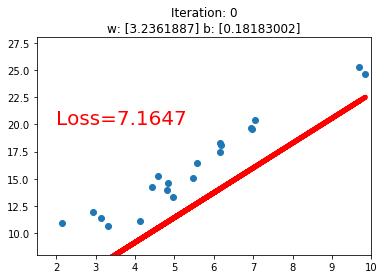

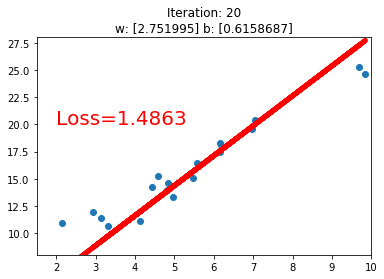

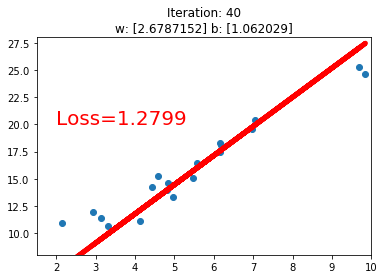

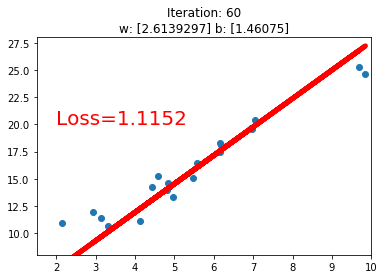

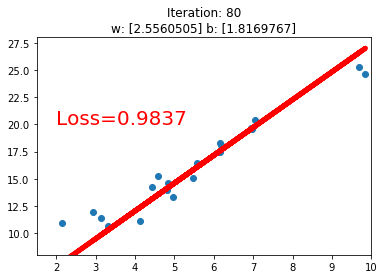

In [63]:
import torch
import matplotlib.pyplot as plt
torch.manual_seed(10)

lr = 0.05  # 学习率

# 创建训练数据
x = torch.rand(20, 1) * 10  # x data (tensor), shape=(20, 1)
y = 2*x + (5 + torch.randn(20, 1))  # y data (tensor), shape=(20, 1)

# 构建线性回归参数的初始值
w = torch.randn((1), requires_grad=True)
b = torch.zeros((1), requires_grad=True)

for iteration in range(1000):

    # 前向传播，计算y_pred=w * x+b
    wx = torch.mul(w, x)
    y_pred = torch.add(wx, b)

    # 计算 MSE loss
    loss = (0.5 * (y - y_pred) ** 2).mean()

    # 反向传播
    loss.backward()

    # 更新参数
    b.data.sub_(lr * b.grad)
    w.data.sub_(lr * w.grad)

    # 清零张量的梯度
    w.grad.zero_()
    b.grad.zero_()

    # 绘图
    if iteration % 20 == 0:
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), y_pred.data.numpy(), 'r-', lw=5)
        plt.text(2, 20, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'})
        plt.xlim(1.5, 10)
        plt.ylim(8, 28)
        plt.title(f"Iteration: {iteration}\nw: {w.data.numpy()} b: {b.data.numpy()}")
        plt.pause(0.5)

        if loss.data.numpy() < 1:
            break


# 4.计算图与动态图机制

Q:计算图是什么？
- 用来描述运算的有向无环图
- 有两个主要元素：结点（Node）和边（Edge）
- 结点表示数据，如向量、矩阵、张量，边表示运算，如加减乘除卷积等

Q:如何用计算图表示$y = (x+w)*(w+1)$?
- $a = x + w, b = w + 1, y = a * b$
- ![](http://anki190912.xuexihaike.com/20200919144309.png?imageView2/2/h/200)

Q:如何用计算图进行梯度求导，如$y = (x+w)*(w+1)$
- $a = x + w, b = w + 1, y = a * b$
- $$\begin{aligned}
\frac{\partial \mathrm{y}}{\partial w} &=\frac{\partial \mathrm{y}}{\partial a} \frac{\partial a}{\partial w}+\frac{\partial \mathrm{y}}{\partial b} \frac{\partial b}{\partial w} \\
&=b * 1+\mathrm{a} * 1 \\
&=\mathrm{b}+\mathrm{a} \\
&=(\mathrm{w}+1)+(\mathrm{x}+\mathrm{w}) \\
&=2 * \mathrm{w}+\mathrm{x}+1 \\
&=2 * 1+2+1=5
\end{aligned}$$
- ![](http://anki190912.xuexihaike.com/20200919144541.png?imageView2/2/h/200)
- y对w求导在计算图中其实就是找到y到w的所有路径上的导数，进行求和

Q:叶子结点是什么？
- ![](http://anki190912.xuexihaike.com/20200919144541.png?imageView2/2/h/200)
- 用户创建的结点称为叶子结点，如X和W
- torch.Tensor中有is_leaf指示张量是否为叶子结点
- 设置叶子结点主要是为了节省内存，因为非叶子结点的梯度在反向传播后会被释放掉
- 若需要保留非叶子结点的梯度，可使用retain_grad()方法

Q:torch.Tensor中的grad_fn作用是什么？
- 记录创建该张量时所用的方法（函数）
- ![](http://anki190912.xuexihaike.com/20200919144541.png?imageView2/2/h/200)
- y.grad_fn = \<MulBackward0\>
- a.grad_fn = \<AddBackward0\>

Q:$y = (x+w)*(w+1)$计算图的代码示例，求解y对w的梯度？

In [84]:
import torch

w = torch.tensor([1.], requires_grad=True)
x = torch.tensor([2.], requires_grad=True)

a = torch.add(w, x)
# 若需要保留非叶子结点a的梯度，否则调用a.grad时为None
# a.retain_grad()
b = torch.add(w, 1)
y = torch.mul(a, b)

y.backward()
print(w.grad)

# 查看叶子结点
print("\nis_leaf:\n", w.is_leaf, x.is_leaf, a.is_leaf, b.is_leaf, y.is_leaf)

# 查看梯度
print("\ngradient:\n", w.grad, x.grad, a.grad, b.grad, y.grad)

# 查看 grad_fn
print("\ngrad_fn:\n", w.grad_fn, x.grad_fn, a.grad_fn, b.grad_fn, y.grad_fn)

tensor([5.])

is_leaf:
 True True False False False

gradient:
 tensor([5.]) tensor([2.]) None None None

grad_fn:
 None None <AddBackward0 object at 0x7f60e97eebe0> <AddBackward0 object at 0x7f60e97ee208> <MulBackward0 object at 0x7f60e97ee780>


# 5.autograd与逻辑回归

Q:torch.autograd.backward是什么？
- torch.autograd.backward(tensors: Union[torch.Tensor, Sequence[torch.Tensor]], grad_tensors: Union[torch.Tensor, Sequence[torch.Tensor], None] = None, retain_graph: Optional[bool] = None, create_graph: bool = False, grad_variables: Union[torch.Tensor, Sequence[torch.Tensor], None] = None) → None
- 功能：自动求取梯度
- tensors：用于求导的张量，如loss
- retain_graph：保存计算图，若不保存，则紧接着再调用一次backward()会报错
- create_graph：创建导数计算图，用于高阶求导
- grad_tensors：多梯度权重

Q:torch.autograd.backward中的retain_graph的代码示例？

In [89]:
w = torch.tensor([1.], requires_grad=True)
x = torch.tensor([2.], requires_grad=True)

a = torch.add(w, x)
b = torch.add(w, 1)
y = torch.mul(a, b)

y.backward(retain_graph=True
          )
print(w.grad)
y.backward()
print(w.grad)

tensor([5.])
tensor([10.])


Q:torch.autograd.backward中的grad_tensors的代码示例？

In [91]:
w = torch.tensor([1.], requires_grad=True)
x = torch.tensor([2.], requires_grad=True)

a = torch.add(w, x)     # retain_grad()
b = torch.add(w, 1)

y0 = torch.mul(a, b)    # y0 = (x+w) * (w+1)
y1 = torch.add(a, b)    # y1 = (x+w) + (w+1)    dy1/dw = 2

loss = torch.cat([y0, y1], dim=0)       # [y0, y1]
grad_tensors = torch.tensor([1., 2.])

# gradient 传入 torch.autograd.backward()中的grad_tensors
loss.backward(gradient=grad_tensors)
# 实际上相当于1*y0导数+2*y1导数

print(w.grad)

tensor([9.])


Q:torch.autograd.grad是什么？
- torch.autograd.grad(outputs: Union[torch.Tensor, Sequence[torch.Tensor]], inputs: Union[torch.Tensor, Sequence[torch.Tensor]], grad_outputs: Union[torch.Tensor, Sequence[torch.Tensor], None] = None, retain_graph: Optional[bool] = None, create_graph: bool = False, only_inputs: bool = True, allow_unused: bool = False) → Tuple[torch.Tensor, ...]
- 功能：求取梯度
- outputs：用于求导的张量，如loss
- inputs：需要梯度的张量
- create_graph：创建导数计算图，用于高阶求导
- retain_graph：保存计算图
- grad_outputs：多梯度权重

Q:如何使用torch.autograd.grad对$y=x^2$进行一阶和二阶求导？

In [92]:
x = torch.tensor([3.], requires_grad=True)
y = torch.pow(x, 2)  # y = x**2

# grad_1 = dy/dx = 2x = 2 * 3 = 6
grad_1 = torch.autograd.grad(y, x, create_graph=True)
print(grad_1)

# grad_2 = d(dy/dx)/dx = d(2x)/dx = 2
# grad_1的返回值是元组，所以要取出第一个
grad_2 = torch.autograd.grad(grad_1[0], x)
print(grad_2)

(tensor([6.], grad_fn=<MulBackward0>),)
(tensor([2.]),)


Q:autograd的3点使用小贴士是什么？
- 1.梯度不自动清零，每次传播时会一直叠加上去，所以使用梯度之后要手动进行清零，即w.grad.zero_()，其中下划线表示inplace（原地）操作
- 2.依赖于叶子结点的节点，requires_grad默认为True
- 3.叶子结点不可执行in-place

Q:逻辑回归的pytorch代码实现是什么？

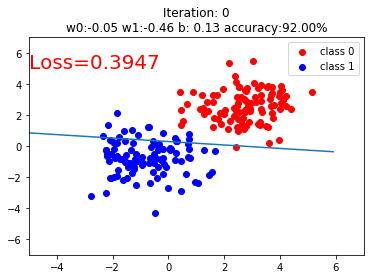

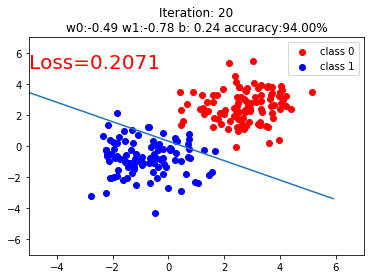

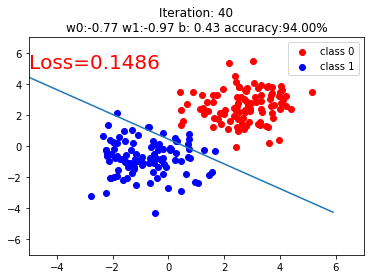

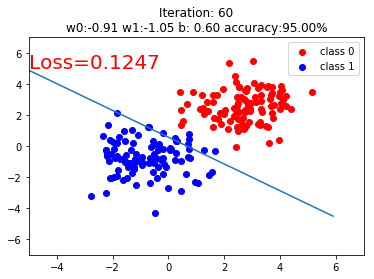

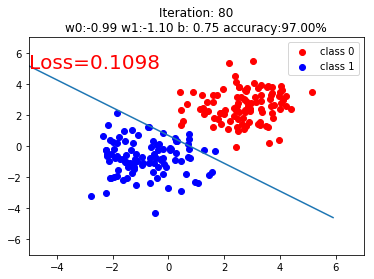

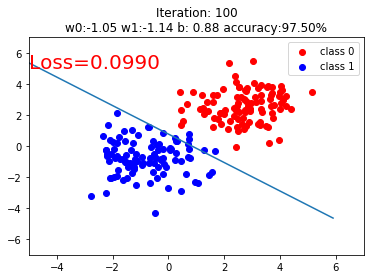

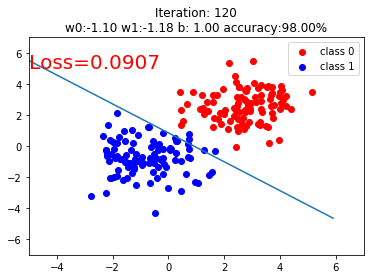

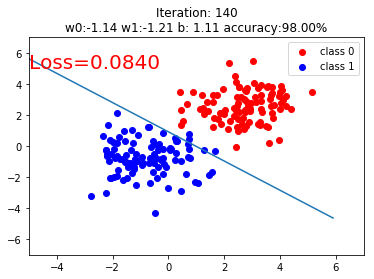

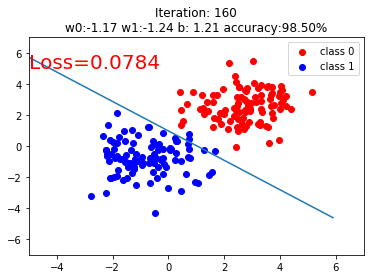

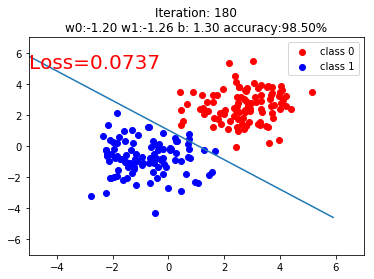

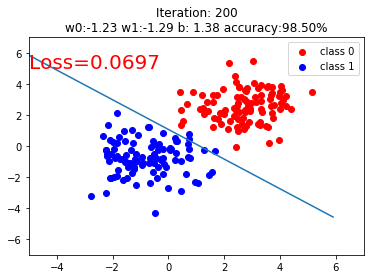

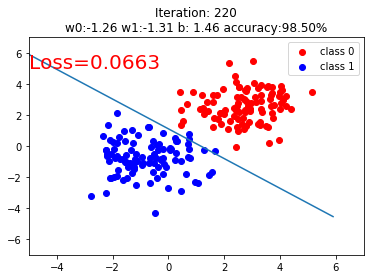

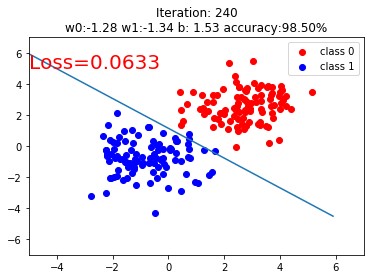

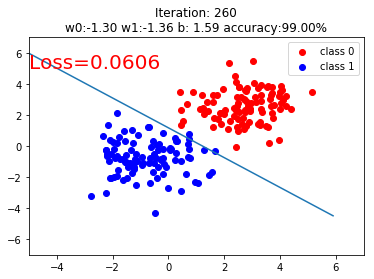

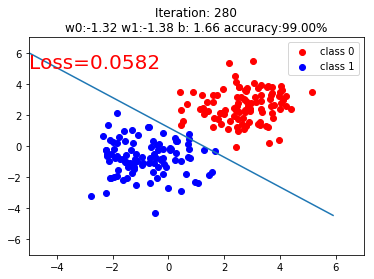

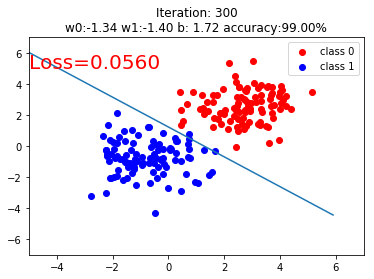

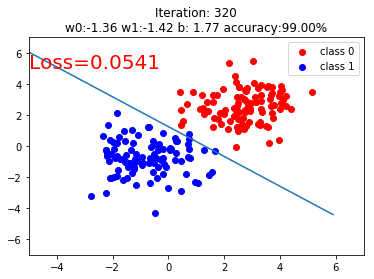

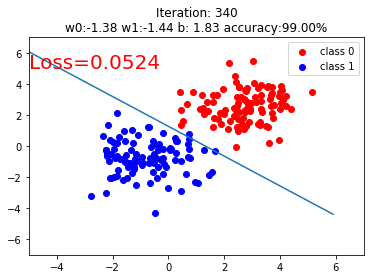

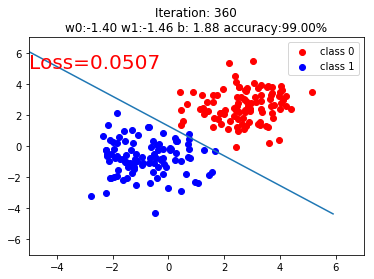

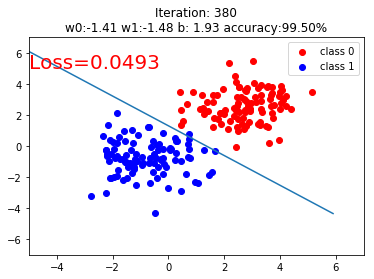

In [94]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
torch.manual_seed(10)

# 生成数据
sample_nums = 100
mean_value = 1.7
bias = 1
n_data = torch.ones(sample_nums, 2)
# 类别0 数据 shape=(100, 2)
x0 = torch.normal(mean_value * n_data, 1) + bias
# 类别0 标签 shape=(100)
y0 = torch.zeros(sample_nums)
# 类别1 数据 shape=(100, 2)
x1 = torch.normal(-mean_value * n_data, 1) + bias
# 类别1 标签 shape=(100)
y1 = torch.ones(sample_nums)
train_x = torch.cat((x0, x1), 0)
train_y = torch.cat((y0, y1), 0)

# 选择模型
class LR(nn.Module):
    def __init__(self):
        super(LR, self).__init__()
        self.features = nn.Linear(2, 1)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = self.features(x)
        x = self.sigmoid(x)
        return x

# 实例化逻辑回归模型
lr_net = LR()

# 选择损失函数，交叉熵损失
loss_fn = nn.BCELoss()

# 选择优化器
lr = 0.01 # 学习率
optimizer = torch.optim.SGD(lr_net.parameters(), lr=lr, momentum=0.9)

# 模型训练
for iteration in range(1000):
    # 前向传播
    y_pred = lr_net(train_x)
    
    # 计算loss
    loss = loss_fn(y_pred.squeeze(), train_y)
    
    # 反向传播
    loss.backward()
    
    # 更新参数
    optimizer.step()
    
    # 清空梯度
    optimizer.zero_grad()
    
    # 绘图
    if iteration % 20 == 0:
        
        # 以0.5为阈值进行分类
        mask = y_pred.ge(0.5).float().squeeze()
        # 计算正确预测的样本个数
        correct = (mask == train_y).sum()
        # 计算分类准确率
        acc = correct.item() / train_y.size(0)
        
        plt.scatter(x0.data.numpy()[:, 0], x0.data.numpy()[:, 1], c='r', label='class 0')
        plt.scatter(x1.data.numpy()[:, 0], x1.data.numpy()[:, 1], c='b', label='class 1')
        
        w0, w1 = lr_net.features.weight[0]
        w0, w1 = float(w0.item()), float(w1.item())
        plot_b = float(lr_net.features.bias[0].item())
        plot_x = np.arange(-6, 6, 0.1)
        plot_y = (-w0 * plot_x - plot_b) / w1
        
        plt.xlim(-5, 7)
        plt.ylim(-7, 7)
        plt.plot(plot_x, plot_y)
        
        plt.text(-5, 5, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size':20, 'color':'red'})
        plt.title("Iteration: {}\nw0:{:.2f} w1:{:.2f} b: {:.2f} accuracy:{:.2%}".format(iteration, w0, w1, plot_b, acc))
        plt.legend()

        plt.show()
        plt.pause(0.5)

        if acc > 0.99:
            break